In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 메뉴 - 런타임 - 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
# 한글 폰트 지정
plt.rc("font", family = "NanumGothic")
# 스타일 서식 적용
plt.style.use('ggplot')

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/sample_submission.csv')
train_df = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/train.csv', encoding='cp949')
test_df = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/test.csv', encoding='cp949')

In [ ]:
train_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from tqdm.auto import tqdm

In [ ]:
# 일조, 일사 열 제거
train_df = train_df.drop(['일조(hr)'], axis=1)
train_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0


In [ ]:
# 결측치 확인
train_df.isna().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

In [ ]:

# Convert 'date_time' column to datetime format
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y-%m-%d %H')

# Extract month, day, and hour into new columns
train_df['month'] = train_df['date_time'].dt.month.astype(float)
train_df['day'] = train_df['date_time'].dt.day.astype(float)
train_df['time'] = train_df['date_time'].dt.hour.astype(float)

# Display the first few rows to confirm the changes
print(train_df.head())

   num           date_time  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  비전기냉방설비운영  태양광보유  \
0    1 2020-06-01 00:00:00    17.6      2.5   92.0      0.8        0.0    0.0   
1    1 2020-06-01 01:00:00    17.7      2.9   91.0      0.3        0.0    0.0   
2    1 2020-06-01 02:00:00    17.5      3.2   91.0      0.0        0.0    0.0   
3    1 2020-06-01 03:00:00    17.1      3.2   91.0      0.0        0.0    0.0   
4    1 2020-06-01 04:00:00    17.0      3.3   92.0      0.0        0.0    0.0   

   전력사용량(kWh)  month  day  time  
0    8179.056    6.0  1.0   0.0  
1    8135.640    6.0  1.0   1.0  
2    8107.128    6.0  1.0   2.0  
3    8048.808    6.0  1.0   3.0  
4    8043.624    6.0  1.0   4.0  


In [ ]:
train_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),비전기냉방설비운영,태양광보유,month,day,time
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,6.0,1.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,6.0,1.0,1.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,6.0,1.0,2.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,6.0,1.0,3.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,6.0,1.0,4.0


In [ ]:
columns = list(train_df.columns)
columns.append(columns.pop(columns.index('전력사용량(kWh)')))
train_df = train_df[columns]

# Display the first few rows to confirm the changes
train_df.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),비전기냉방설비운영,태양광보유,전력사용량(kWh)
0,1,2020-06-01 00,17.6,2.5,92.0,0.8,0.0,0.0,8179.056
1,1,2020-06-01 01,17.7,2.9,91.0,0.3,0.0,0.0,8135.640
2,1,2020-06-01 02,17.5,3.2,91.0,0.0,0.0,0.0,8107.128
3,1,2020-06-01 03,17.1,3.2,91.0,0.0,0.0,0.0,8048.808
4,1,2020-06-01 04,17.0,3.3,92.0,0.0,0.0,0.0,8043.624


In [ ]:
# 하이퍼파라미터
input_size = 10  # feature의 개수
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 5
window_size = 24  # 예측에 사용될 시간 윈도우 크기
batch_size = 64
learning_rate = 0.001

In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, df, window_size):
        self.df = df
        self.window_size = window_size

    def __len__(self):
        return len(self.df) - self.window_size

    def __getitem__(self, idx):
        x = torch.tensor(self.df[idx:idx+self.window_size, :], dtype=torch.float)
        if self.df.shape[1] > 1:
            y = torch.tensor(self.df[idx+self.window_size, -1], dtype=torch.float)
        else:
            y = None
        return x, y

def create_data_loader(df, window_size, batch_size):
    dataset = TimeSeriesDataset(df, window_size)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return data_loader

In [ ]:
# normalization
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_df.drop(['num', 'date_time'], axis=1).values)
train_loader = create_data_loader(train_data, window_size, batch_size)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"current device: {device}")

model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

current device: cpu


In [ ]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).to(device)

        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 300 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

Epoch [1/5], Step [300/1913], Loss: 0.0070
Epoch [1/5], Step [600/1913], Loss: 0.0002
Epoch [1/5], Step [900/1913], Loss: 0.0002
Epoch [1/5], Step [1200/1913], Loss: 0.0001
Epoch [1/5], Step [1500/1913], Loss: 0.0029
Epoch [1/5], Step [1800/1913], Loss: 0.0001
Epoch [2/5], Step [300/1913], Loss: 0.0000
Epoch [2/5], Step [600/1913], Loss: 0.0002
Epoch [2/5], Step [900/1913], Loss: 0.0012
Epoch [2/5], Step [1200/1913], Loss: 0.0001
Epoch [2/5], Step [1500/1913], Loss: 0.0017
Epoch [2/5], Step [1800/1913], Loss: 0.0001
Epoch [3/5], Step [300/1913], Loss: 0.0000
Epoch [3/5], Step [600/1913], Loss: 0.0000
Epoch [3/5], Step [900/1913], Loss: 0.0002
Epoch [3/5], Step [1200/1913], Loss: 0.0000
Epoch [3/5], Step [1500/1913], Loss: 0.0018
Epoch [3/5], Step [1800/1913], Loss: 0.0002
Epoch [4/5], Step [300/1913], Loss: 0.0000
Epoch [4/5], Step [600/1913], Loss: 0.0000
Epoch [4/5], Step [900/1913], Loss: 0.0000
Epoch [4/5], Step [1200/1913], Loss: 0.0000
Epoch [4/5], Step [1500/1913], Loss: 0.0002


In [ ]:
train_df.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),비전기냉방설비운영,태양광보유,전력사용량(kWh),month,day,time
0,1,2020-06-01 00:00:00,17.6,2.5,92.0,0.8,0.0,0.0,8179.056,6.0,1.0,0.0
1,1,2020-06-01 01:00:00,17.7,2.9,91.0,0.3,0.0,0.0,8135.640,6.0,1.0,1.0
2,1,2020-06-01 02:00:00,17.5,3.2,91.0,0.0,0.0,0.0,8107.128,6.0,1.0,2.0
3,1,2020-06-01 03:00:00,17.1,3.2,91.0,0.0,0.0,0.0,8048.808,6.0,1.0,3.0
4,1,2020-06-01 04:00:00,17.0,3.3,92.0,0.0,0.0,0.0,8043.624,6.0,1.0,4.0


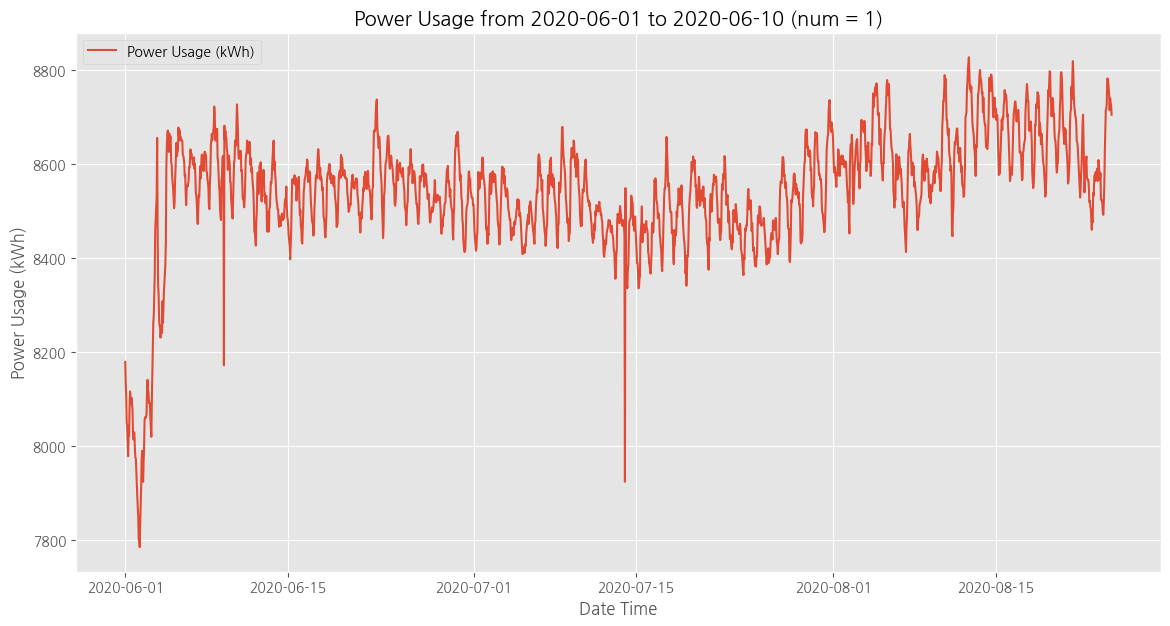

In [ ]:
# 'date_time' 열을 datetime 형식으로 변환
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y-%m-%d %H')

# num == 1인 데이터 필터링 및 특정 기간의 데이터 필터링
num_value = 1
# start_date = '2020-06-01'
# end_date = '2020-06-10'
# filtered_df = train_df[(train_df['num'] == num_value) & (train_df['date_time'] >= start_date) & (train_df['date_time'] <= end_date)]

filtered_df = train_df[(train_df['num'] == num_value)]


# date_time과 전력 사용량 데이터를 시계열 데이터로 설정
date_time_filtered = filtered_df['date_time']
power_usage_filtered = filtered_df['전력사용량(kWh)']

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(date_time_filtered, power_usage_filtered, label='Power Usage (kWh)')
plt.xlabel('Date Time')
plt.ylabel('Power Usage (kWh)')
plt.title('Power Usage from 2020-06-01 to 2020-06-10 (num = 1)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


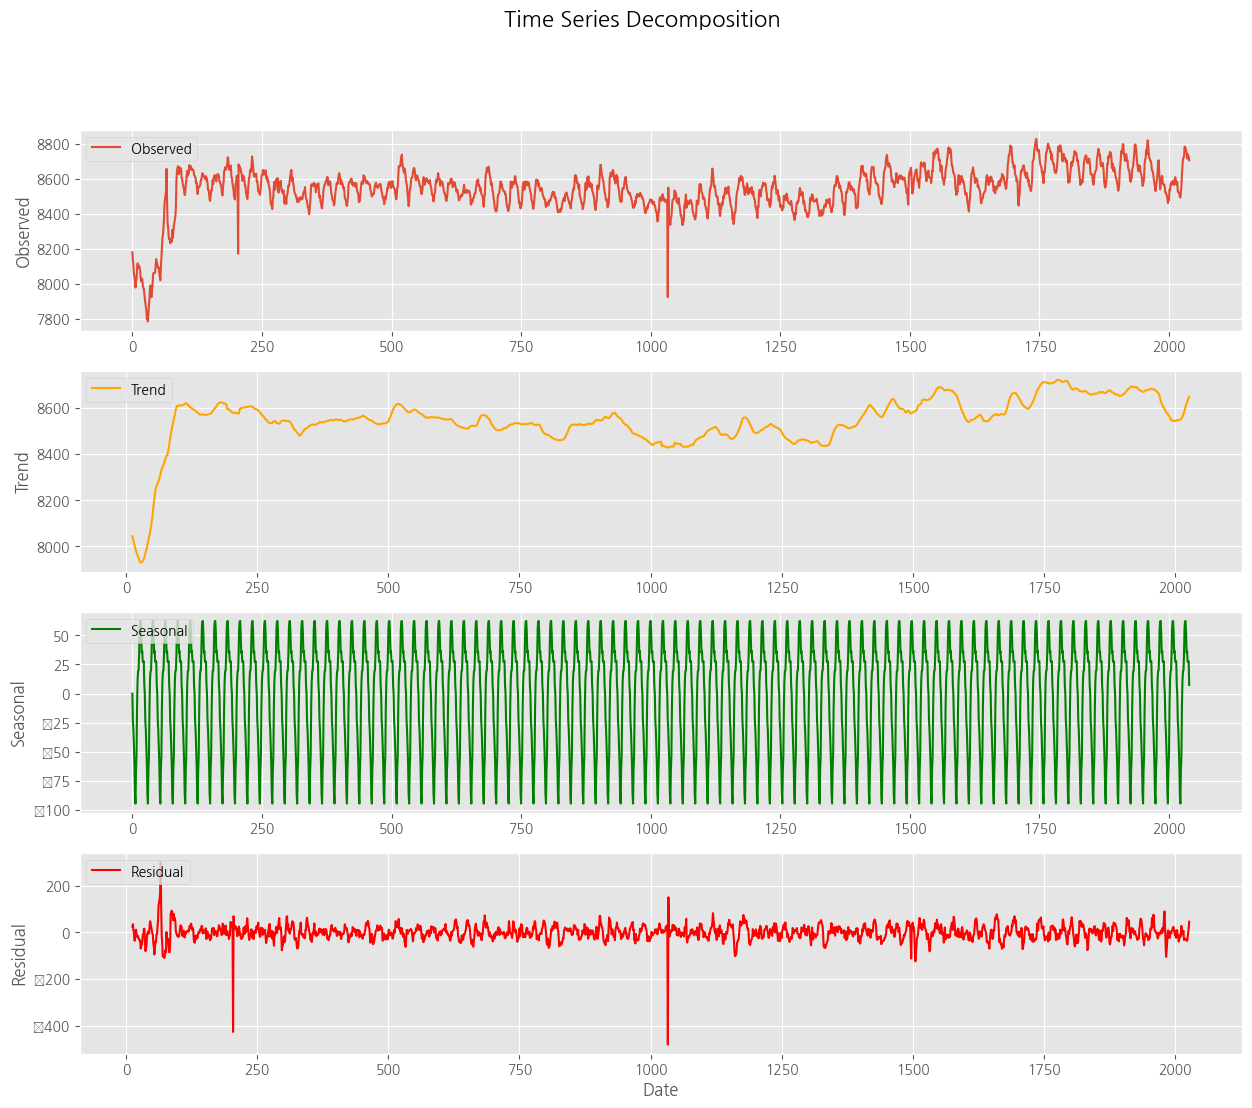

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해 (하루 단위의 계절성을 가정하여 period=24 설정)
decomposition = seasonal_decompose(filtered_df['전력사용량(kWh)'], model='additive', period=24)

# 분해된 요소들을 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.ylabel('Observed')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.ylabel('Residual')

plt.xlabel('Date')
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.show()

In [ ]:

# Correcting variable name
# Step 1: Data Preparation
# We have already renamed the relevant columns and dropped NA values
usage_series = filtered_df['전력사용량(kWh)'].dropna()

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


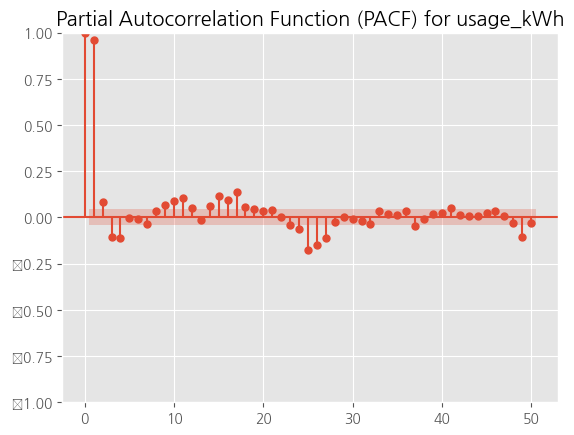

In [ ]:
# Step 4: PACF Calculation and Visualization
from statsmodels.graphics.tsaplots import plot_pacf
# Plot PACF for the usage_kWh series
plt.figure(figsize=(12, 6))
plot_pacf(usage_series, lags=50)
plt.title('Partial Autocorrelation Function (PACF) for usage_kWh')
plt.show()

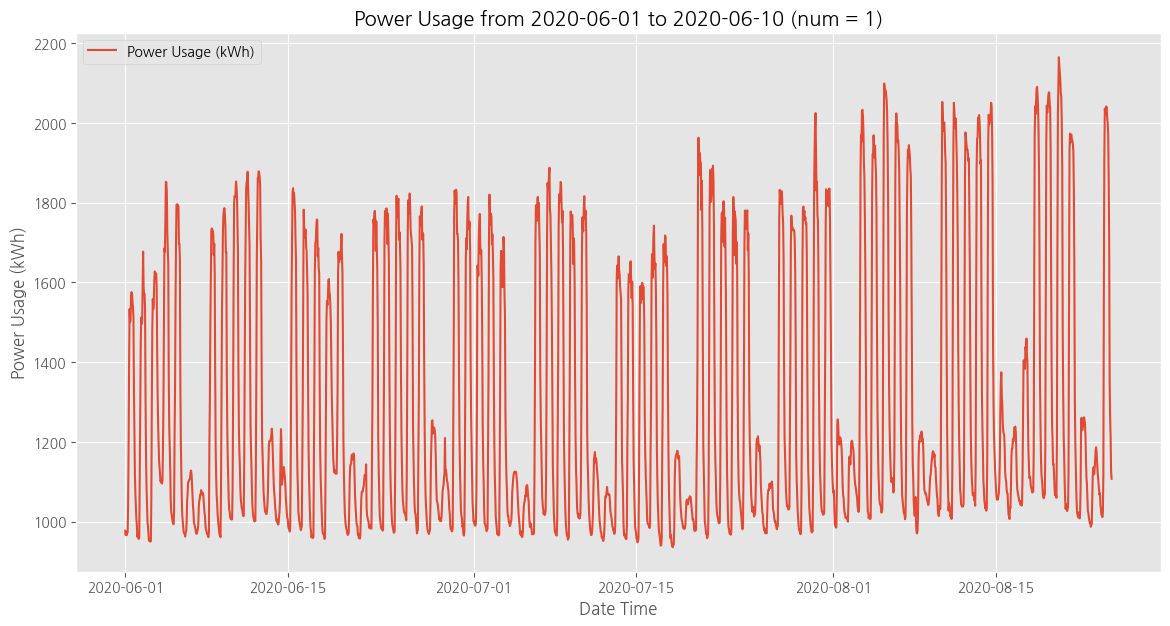

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


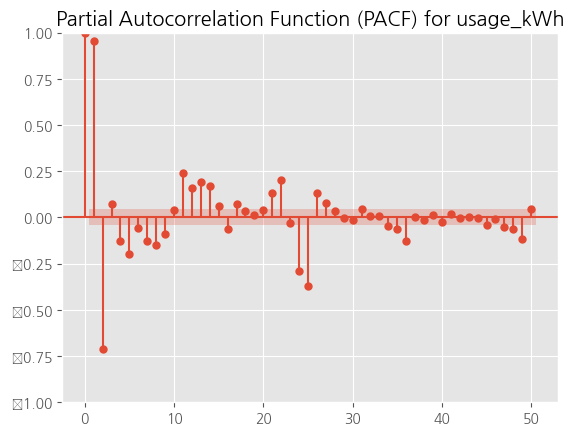

In [ ]:
# num == 1인 데이터 필터링 및 특정 기간의 데이터 필터링
num_value = 2
# start_date = '2020-06-01'
# end_date = '2020-06-10'
# filtered_df = train_df[(train_df['num'] == num_value) & (train_df['date_time'] >= start_date) & (train_df['date_time'] <= end_date)]

filtered_df = train_df[(train_df['num'] == num_value)]

usage_series = filtered_df['전력사용량(kWh)'].dropna()

# date_time과 전력 사용량 데이터를 시계열 데이터로 설정
date_time_filtered = filtered_df['date_time']
power_usage_filtered = filtered_df['전력사용량(kWh)']

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(date_time_filtered, power_usage_filtered, label='Power Usage (kWh)')
plt.xlabel('Date Time')
plt.ylabel('Power Usage (kWh)')
plt.title('Power Usage from 2020-06-01 to 2020-06-10 (num = 1)')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: PACF Calculation and Visualization
from statsmodels.graphics.tsaplots import plot_pacf
# Plot PACF for the usage_kWh series
plt.figure(figsize=(12, 6))
plot_pacf(usage_series, lags=50)
plt.title('Partial Autocorrelation Function (PACF) for usage_kWh')
plt.show()

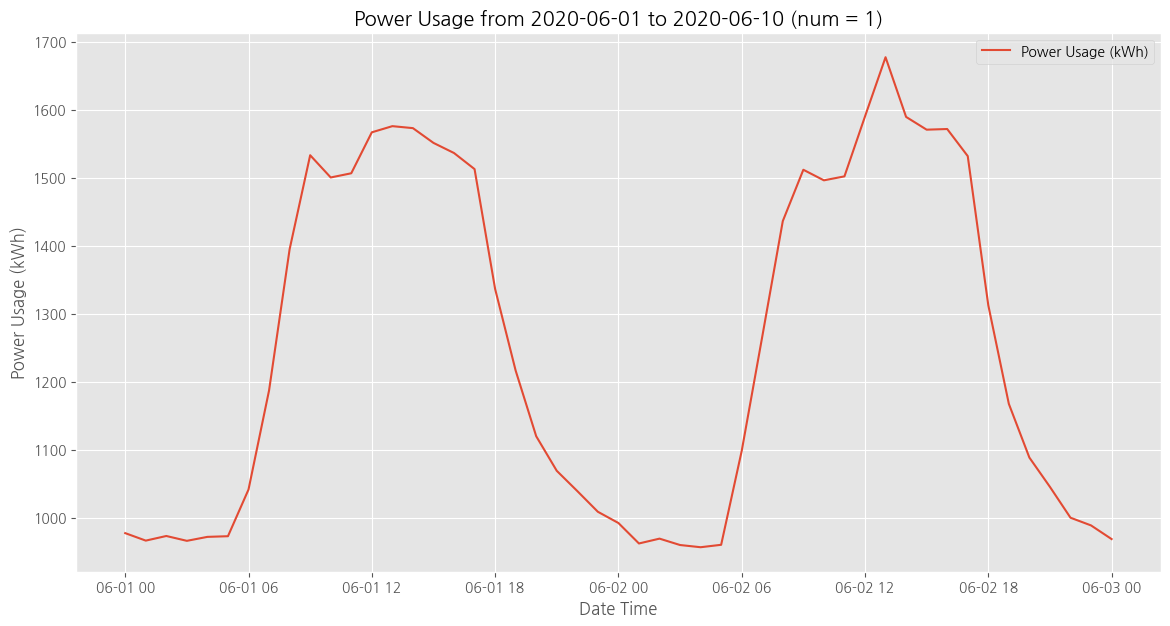

In [ ]:
# num == 1인 데이터 필터링 및 특정 기간의 데이터 필터링

num_value = 2
start_date = '2020-06-01'
end_date = '2020-06-03'
filtered_df = train_df[(train_df['num'] == num_value) & (train_df['date_time'] >= start_date) & (train_df['date_time'] <= end_date)]



# date_time과 전력 사용량 데이터를 시계열 데이터로 설정
date_time_filtered = filtered_df['date_time']
power_usage_filtered = filtered_df['전력사용량(kWh)']

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(date_time_filtered, power_usage_filtered, label='Power Usage (kWh)')
plt.xlabel('Date Time')
plt.ylabel('Power Usage (kWh)')
plt.title('Power Usage from 2020-06-01 to 2020-06-10 (num = 1)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 시간별 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,61):
    df = train[train.num==num]
    ax = fig.add_subplot(10,6,num)
    ax.plot(df['hour'].unique(), df.groupby('hour')['전력사용량(kWh)'].mean())
    ax.set_title(f'건물: {num}')
    ax.set_xticks([0,6,12,18,24])
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 요일별 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

weekday = ['월','화','수','목','금','토','일']
colors = ['skyblue','skyblue','skyblue','skyblue','skyblue','pink','pink']

for num in range(1,61):
    df = train[train.num==num]
    df_counts = df.groupby('weekday')['전력사용량(kWh)'].mean()
    df_counts = df_counts.reindex(weekday)
    ax = fig.add_subplot(10,6,num)
    ax.bar(df['weekday'].unique(), df_counts, color=colors)
    ax.set_title(f'건물: {num}')
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 시간에 따른 주말여부 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,61):
    df = train[train.num==num]
    ax = fig.add_subplot(10,6,num)
    ax.plot(df['hour'].unique(), df[df.weekend==0].groupby('hour')['전력사용량(kWh)'].mean(), label='평일')
    ax.plot(df['hour'].unique(), df[df.weekend==1].groupby('hour')['전력사용량(kWh)'].mean(), label='주말')
    ax.set_title(f'건물: {num}')
    ax.set_xticks([0,6,12,18,24])
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 1, prop={'size':12})
plt.tight_layout()
plt.show()